In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
# Convert field names to dict for easy access.
# Can be hard coded 
# 
fields_path = '../../input/training_validation_2/fields.csv'  
fields_df = pd.read_csv(fields_path)
fields_df.columns = ['name', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6']

fields_dict = {}
fields_dictv2 = {}

for idx in range(fields_df.shape[0]):
    name = fields_df.loc[idx, 'name']

    _fields = []
    
    for f in fields_df.columns[1:]:
        if not (str(fields_df.loc[idx, f]) == 'nan'):
            _fields.append(name + "_" + str(fields_df.loc[idx, f]))
    
    fields_dict[idx] = {'name': fields_df.loc[idx, 'name'] , 'fields': _fields}
    fields_dictv2[name] = _fields
    
# fields_dict

In [17]:
feature_list = [fields_dict[47]['name']]
feature_list_regex= "|".join(["^"+f+"_" for f in feature_list])

feature_list

['VacuumValveClosed']

In [18]:
# import data
data_df_1 = pd.read_csv("../../data/training_validation_1.csv")
data_df_2 = pd.read_csv("../../data/training_validation_2.csv")
merged_df = pd.concat([data_df_1, data_df_2], axis=0) # Merge data frames


In [19]:
train_df = merged_df.filter(regex=feature_list_regex)
# train_df = train_df.filter(regex="vCnt|value")
# train_df = data_df_2.filter(regex="^Temperature")

In [20]:
train_df.head()

,VacuumValveClosed_vCnt,VacuumValveClosed_vFreq,VacuumValveClosed_vMax,VacuumValveClosed_vMin,VacuumValveClosed_vStd,VacuumValveClosed_vTrend,VacuumValveClosed_value
0,0,0.000000,NaN,NaN,NaN,NaN,NaN
1,13,1.288343,-0.382305,-0.715812,0.112918,-0.013857,-0.580892
2,20,1.978518,-0.364727,-0.721671,0.109421,-0.008111,-0.596008
3,23,2.288817,-0.337382,-0.745598,0.116748,-0.002082,-0.595118
4,22,2.189399,-0.276345,-0.720206,0.112639,-0.001516,-0.615755


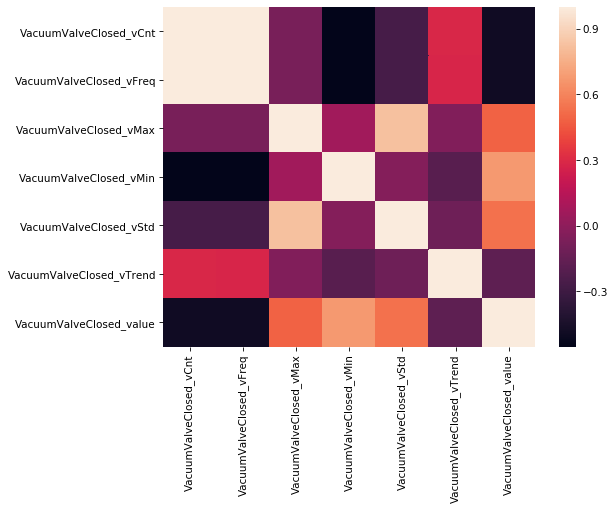

In [21]:
fig = plt.figure(figsize=(8,6), dpi=75)
sns.heatmap(train_df.corr(),annot=False)

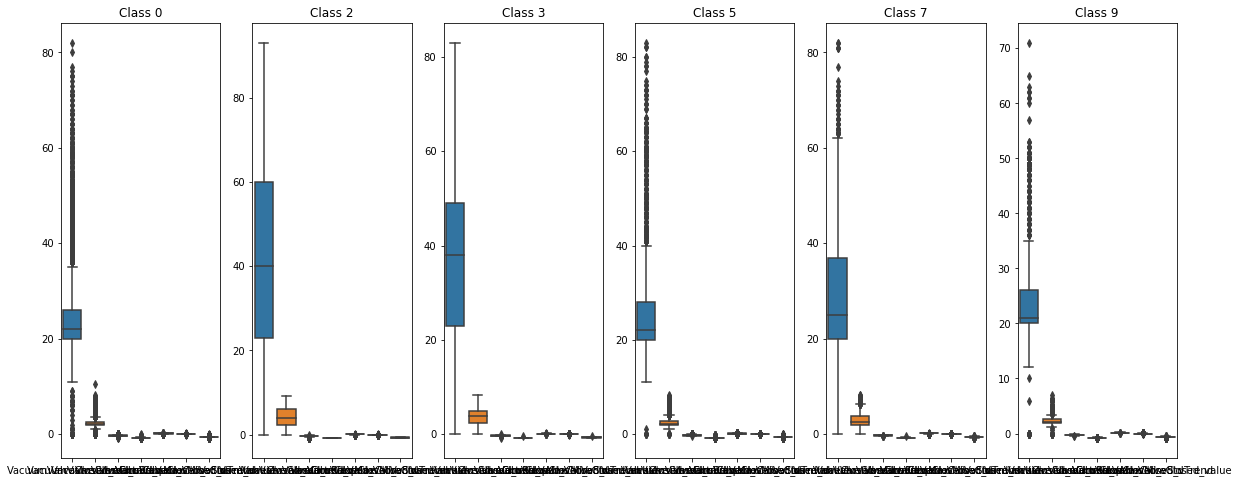

In [22]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()

fig, axes = plt.subplots(1, len(classes), sharex=True, figsize=(20,8))
# fig.suptitle('1 row x 2 columns axes with no data')

for idx, c in enumerate(classes):
    df = train_df[merged_df['class'] == c].copy()
#     df = train_df.copy()
    sns.boxplot(data=df, ax=axes[idx])
    axes[idx].set_title('Class '+str(c))


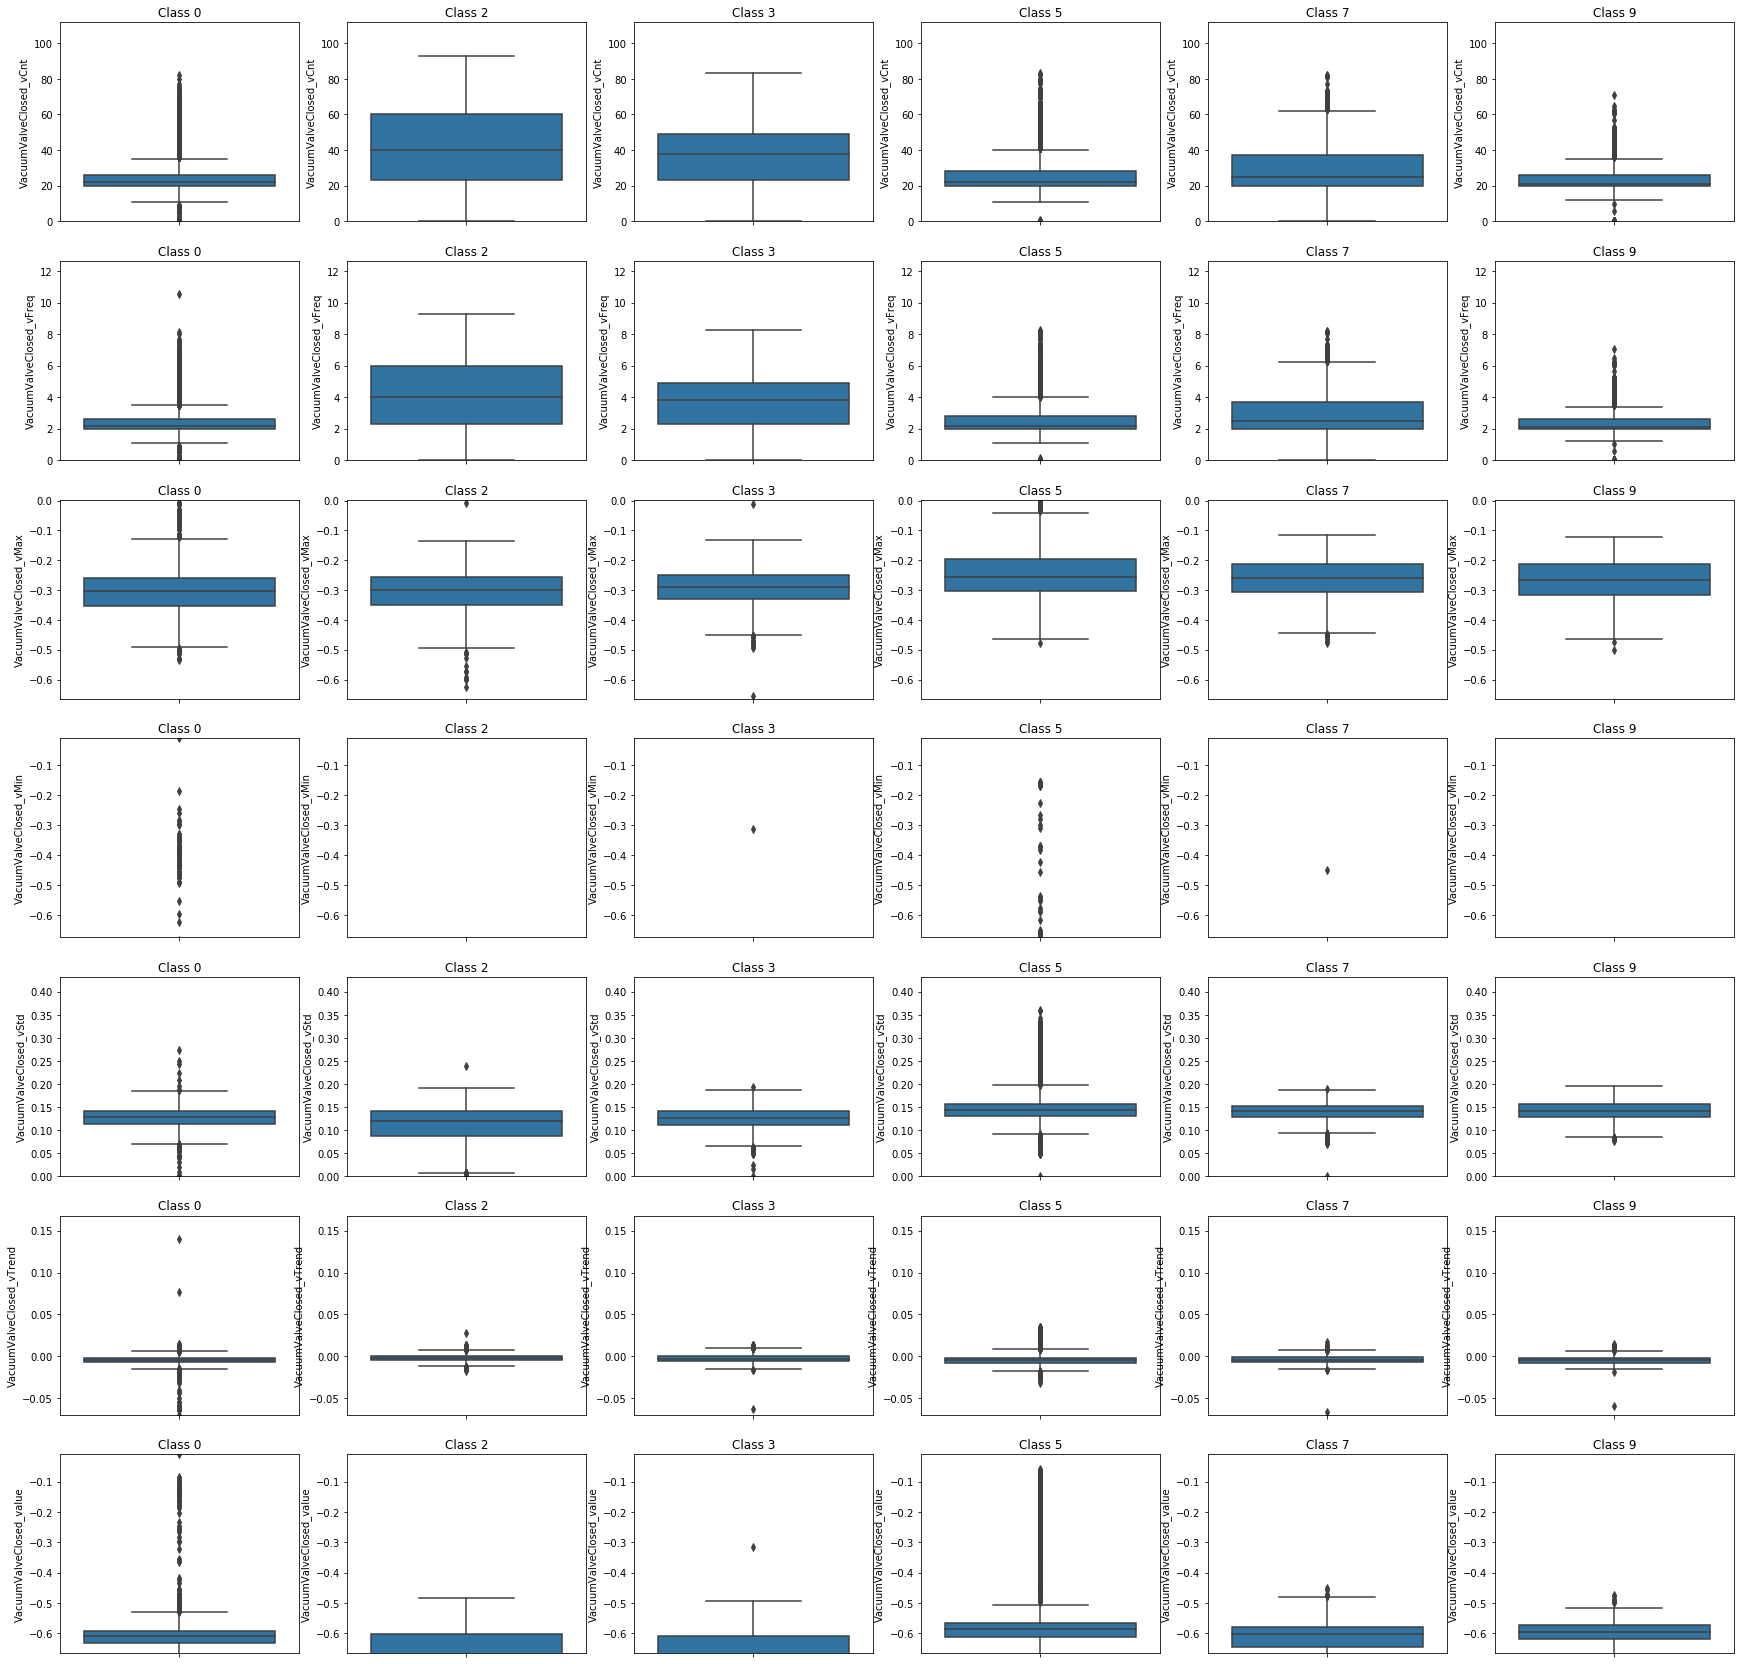

In [23]:
# fig = plt.figure(figsize=(10, 8), dpi=75)


classes = data_df_2['class'].unique()
features = train_df.columns

fig, axes = plt.subplots(len(features), len(classes), sharex=True, figsize=(30,30))
# print (axes)
# fig.suptitle('1 row x 2 columns axes with no data')

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()
#         print (f, c, df2.columns)
        sns.boxplot(y=df2[f], ax=axes[idx1, idx2])
        axes[idx1, idx2].set_title('Class '+str(c))
        axes[idx1, idx2].set_ylim(0.8*df[f].min(), 1.2*df[f].max())


In [24]:
# classes = data_df_2['class'].unique()
# features = train_df.columns

# fig, axes = plt.subplots(len(features), 1, sharex=True, figsize=(30,16))

# for idx1, f in enumerate(features):
#     df = data_df_2[[f, 'class']].copy()
#     axes[idx1].set_title('Feature '+str(f))
#     for idx2, c in enumerate(classes):
#         df2 = df[df['class'] == c].copy()
#         axes[idx1].boxplot(x=df2[f], positions=[idx2], labels=[c])
    


In [25]:
# train_df2 = pd.concat([data_df_2['class'], train_df], axis=1)
# axes = train_df2.groupby('class').boxplot(figsize=(20, 10))

In [26]:
classes = data_df_2['class'].unique()
features = train_df.columns

new_df = pd.DataFrame()

df_list = []

for idx1, f in enumerate(features):
    df = merged_df[[f, 'class']].copy()
    data = [[
        99, f, df[f].max(), df[f].min(), df[f].std(), df[f].mean(), df[f].median(), df[f].count(), df[f].isna().sum(),
        ]]

    data_df = pd.DataFrame(data)

    df_list.append(data_df)

    for idx2, c in enumerate(classes):
        df2 = df[df['class'] == c].copy()

        data = [[
            c, f, df2[f].max(), df2[f].min(), df2[f].std(), df2[f].mean(), df2[f].median(), df2[f].count(), df2[f].isna().sum(),
            ]]
        
        data_df = pd.DataFrame(data)
        df_list.append(data_df)
        
new_df = pd.concat(df_list, axis=0)
        
new_df.columns = ['class', 'feature', 'max', 'min', 'std', 'mean', 'median', 'Count', 'NA_count']

In [27]:
new_df[new_df['class']==99]

,class,feature,max,min,std,mean,median,Count,NA_count
0,99,VacuumValveClosed_vCnt,93.000000,0.000000,12.341007,27.666179,23.000000,39611,0
0,99,VacuumValveClosed_vFreq,10.525338,0.000000,1.228873,2.753441,2.289716,39611,0
0,99,VacuumValveClosed_vMax,0.002228,-0.830073,0.081509,-0.295765,-0.292459,39408,203
0,99,VacuumValveClosed_vMin,-0.008271,-0.842769,0.034133,-0.752653,-0.746086,39408,203
0,99,VacuumValveClosed_vStd,0.359868,0.000000,0.026757,0.129683,0.131030,39408,203
0,99,VacuumValveClosed_vTrend,0.139897,-0.087356,0.004857,-0.003990,-0.004337,39392,219
0,99,VacuumValveClosed_value,-0.008271,-0.832037,0.067941,-0.618878,-0.608655,39408,203


In [28]:
missing = 0

for c in classes:
    class_df = merged_df[merged_df['class']==c]
    runs = class_df['run'].unique()
    for r in runs:
        run_df = class_df[class_df['run'] == r]
        for f in features:
            f_df = run_df.filter([f]).copy().reset_index()
            del f_df['index']
            l = len(f_df)
            n_df = f_df[f_df[f].isna()]
#             if len(f_df) != len(n_df): print (c, r, f, len(f_df), len(n_df))
            if (len(n_df) == 0): continue
            missing += len(n_df)
            for i in list(n_df.index):
                if ((i == 0) | (i == l-1)): 
                    print ('NA at start or end')
                else:
                    print (c, r, f, len(f_df), list(n_df.index))
print (missing)

NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 17 VacuumValveClosed_vMax 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumValveClosed_vMin 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumValveClosed_vStd 362 [0, 1, 361]
NA at start or end
NA at start or end
0 17 VacuumValveClosed_vTrend 362 [0, 1, 360, 361]
0 17 VacuumValveClosed_vTrend 362 [0, 1, 360, 361]
NA at start or end
NA at start or end
0 17 VacuumValveClosed_value 362 [0, 1, 361]
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end
NA at start or end

0 56 VacuumValveClosed_vMax 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vMax 1080 [0, 1, 2, 3, 1079]
NA at start or end
NA at start or end
0 56 VacuumValveClosed_vMin 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vMin 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vMin 1080 [0, 1, 2, 3, 1079]
NA at start or end
NA at start or end
0 56 VacuumValveClosed_vStd 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vStd 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vStd 1080 [0, 1, 2, 3, 1079]
NA at start or end
NA at start or end
0 56 VacuumValveClosed_vTrend 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vTrend 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_vTrend 1080 [0, 1, 2, 3, 1079]
NA at start or end
NA at start or end
0 56 VacuumValveClosed_value 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_value 1080 [0, 1, 2, 3, 1079]
0 56 VacuumValveClosed_value 1080 [0, 1, 2, 3, 1079]
NA at start or end
NA at start or end
0 57 VacuumValveClosed_vMax 1080 [0, 1, 2, 3, 1079]
0 57 VacuumValveClose

NA at start or end
NA at start or end
NA at start or end
NA at start or end
0 83 VacuumValveClosed_vMax 361 [359, 360]
NA at start or end
0 83 VacuumValveClosed_vMin 361 [359, 360]
NA at start or end
0 83 VacuumValveClosed_vStd 361 [359, 360]
NA at start or end
0 83 VacuumValveClosed_vTrend 361 [359, 360]
NA at start or end
0 83 VacuumValveClosed_value 361 [359, 360]
NA at start or end
NA at start or end
0 86 VacuumValveClosed_vMax 361 [0, 359, 360]
NA at start or end
NA at start or end
0 86 VacuumValveClosed_vMin 361 [0, 359, 360]
NA at start or end
NA at start or end
0 86 VacuumValveClosed_vStd 361 [0, 359, 360]
NA at start or end
NA at start or end
0 86 VacuumValveClosed_vTrend 361 [0, 359, 360]
NA at start or end
NA at start or end
0 86 VacuumValveClosed_value 361 [0, 359, 360]
NA at start or end
0 88 VacuumValveClosed_vMax 361 [359, 360]
NA at start or end
0 88 VacuumValveClosed_vMin 361 [359, 360]
NA at start or end
0 88 VacuumValveClosed_vStd 361 [359, 360]
NA at start or end
0 

7 0 VacuumValveClosed_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_vTrend 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
NA at start or end
NA at start or end
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
7 0 VacuumValveClosed_value 370 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 369]
NA at start or end
NA at start or end
7 2 VacuumValveClosed_vMax 1080 [0, 